In [42]:
import pandas as pd
import numpy as np

sizes = [1000, 10000, 100000, 1000000]

data = []
for size in sizes:
    with open(f"scalability_num_runs_1/adult_{size}_time.log") as f:
        lines = f.readlines()
        for line in lines:
            times = [size]
            times += [float(x) for x in line.split(", ")]
            data.append(times)

df = pd.DataFrame(data=data, columns=["size", "Q1", "Q2", "Q3", "Q4", "Q5"])
df

,size,Q1,Q2,Q3,Q4,Q5
0,1000,1.460452,2.384278,2.487151,1.186856,2.252294
1,1000,1.450419,2.373092,2.189794,0.963723,2.258887
2,1000,1.445026,3.803822,1.490578,0.966547,2.257256
3,1000,1.444439,3.782482,5.974076,1.199813,2.263169
4,1000,1.449056,3.430769,2.074795,0.969917,2.259715
5,1000,1.453375,3.790817,1.927767,0.974226,2.253257
6,1000,1.455014,3.444227,2.363710,0.965673,2.264790
7,1000,1.451562,3.095965,1.784038,0.961708,2.262154
8,1000,1.448010,3.440758,5.935018,1.198918,2.263592
9,1000,1.452109,4.072935,2.523523,1.196780,2.254863


In [43]:
df = df.melt(id_vars="size", var_name="query", value_name="time")
df

,size,query,time
0,1000,Q1,1.460452
1,1000,Q1,1.450419
2,1000,Q1,1.445026
3,1000,Q1,1.444439
4,1000,Q1,1.449056
...,...,...,...
195,1000000,Q5,5788.590419
196,1000000,Q5,5848.721801
197,1000000,Q5,5880.018954
198,1000000,Q5,5763.816969


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="ticks", palette="colorblind", font="Times New Roman", font_scale=1.6)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

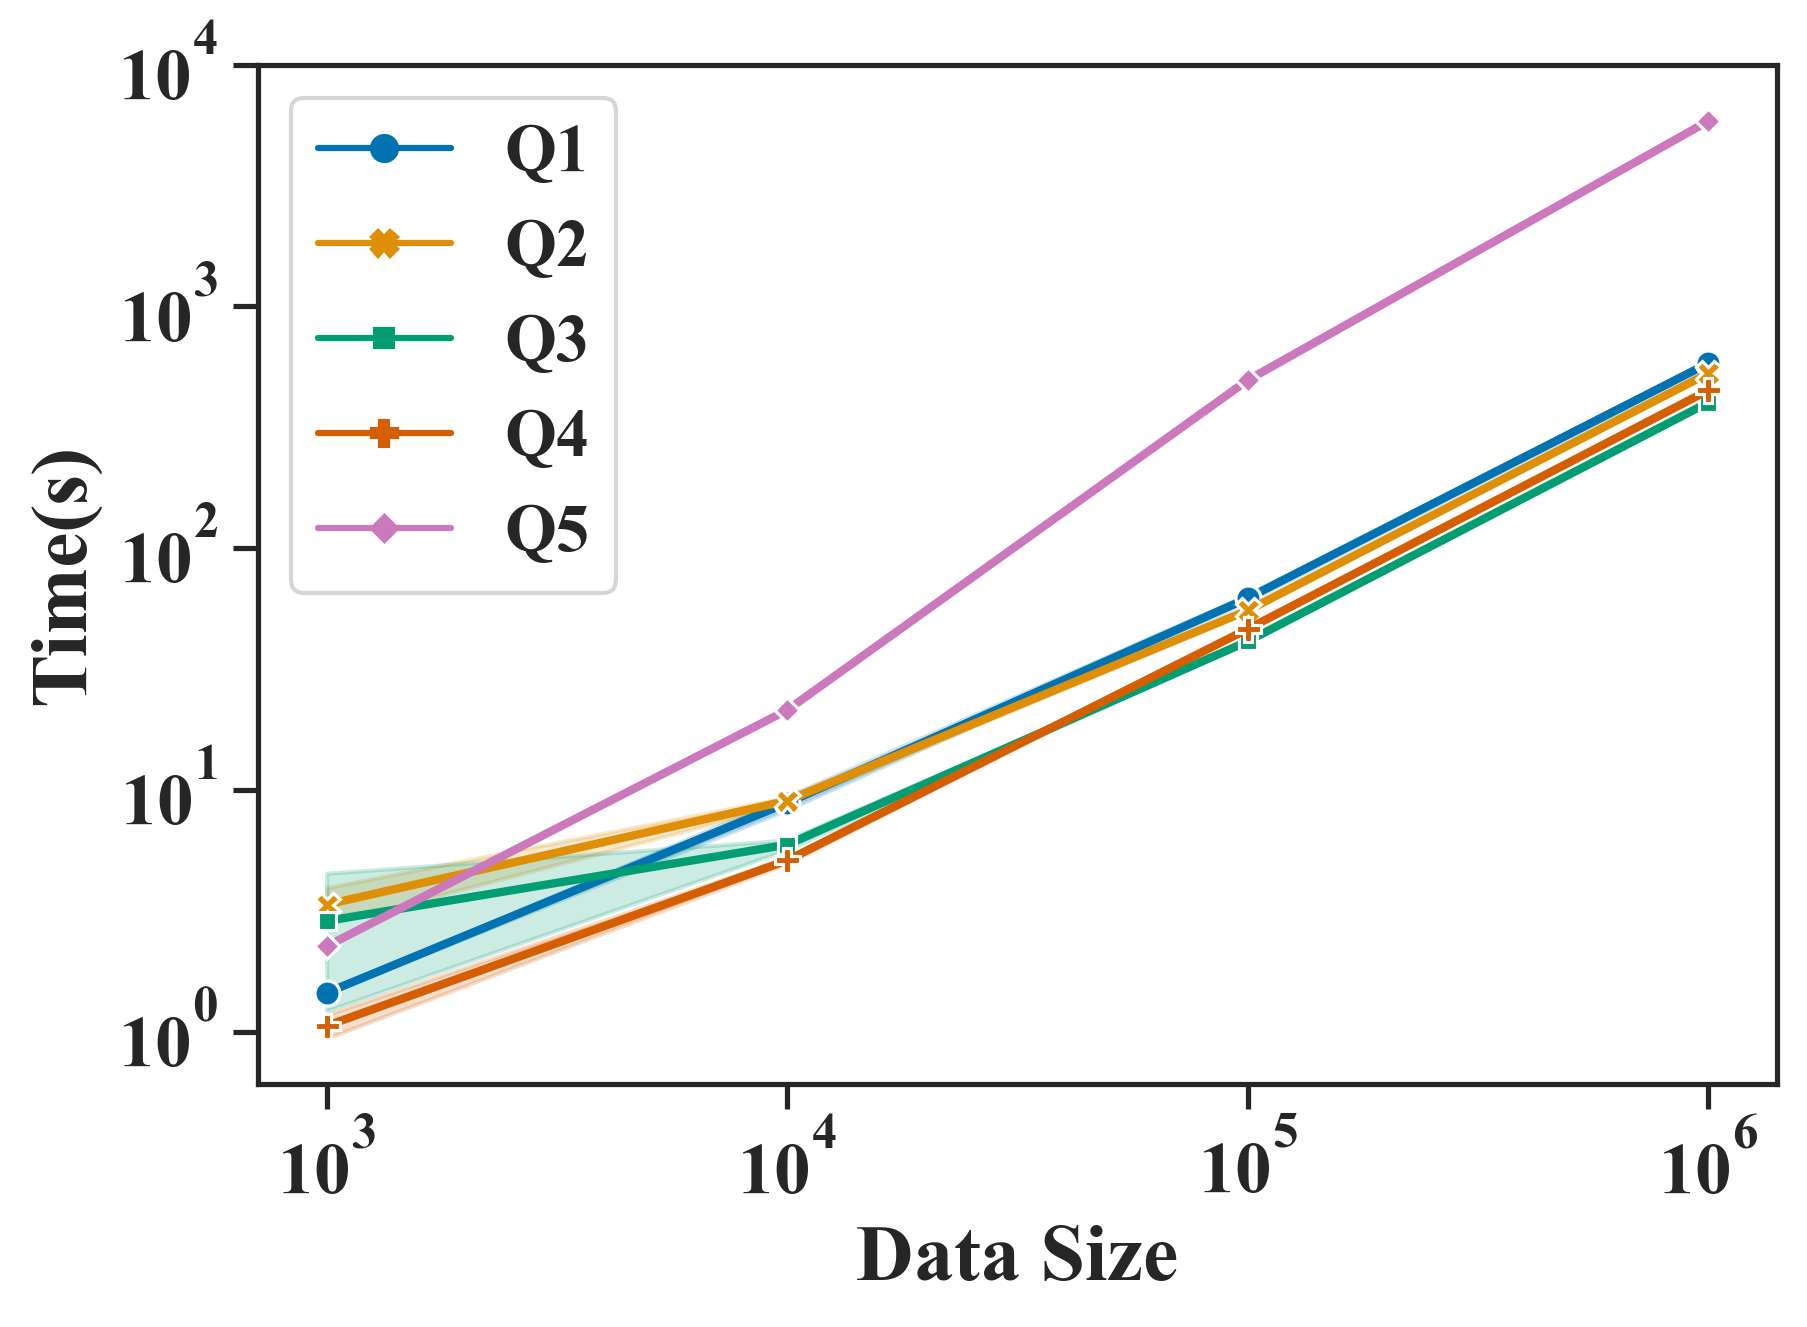

In [59]:
g = sns.lineplot(
    data=df, x="size", y="time", hue="query", err_style="band", errorbar="sd", style="query", markers=True, dashes=False, linewidth=2)
g.set_yscale("log")
g.set_xscale("log")
_ = g.set_yticks([1, 10, 100, 1000, 10000])
_ = g.set(xlabel="Data Size", ylabel="Time(s)")
plt.legend(fontsize='small', title_fontsize='small')
plt.minorticks_off()
g.legend_.set_title(None)
plt.tight_layout()
plt.savefig("figures/scalability.pdf")
plt.show()
plt.close()

In [38]:
data = []
for size in sizes:
    with open(f"scalability_num_runs_1/adult_{size}_eps.log") as f:
        lines = f.readlines()
        for line in lines:
            eps_res = [size]
            split = line.split(", ")
            for eps in split:
                if eps == "None":
                    eps_res.append(np.nan)
                else:
                    eps_res.append(float(eps))
            data.append(eps_res)

df = pd.DataFrame(data=data, columns=["size", "Q1", "Q2", "Q3", "Q4", "Q5"])
df

,size,Q1,Q2,Q3,Q4,Q5
0,1000,10.0,7.0,0.7,9.0,10.0
1,1000,10.0,7.0,0.9,10.0,10.0
2,1000,10.0,3.0,5.0,10.0,10.0
3,1000,10.0,3.0,NaN,9.0,10.0
4,1000,10.0,4.0,1.0,10.0,10.0
5,1000,10.0,3.0,2.0,10.0,10.0
6,1000,10.0,4.0,0.8,10.0,10.0
7,1000,10.0,5.0,3.0,10.0,10.0
8,1000,10.0,4.0,NaN,9.0,10.0
9,1000,10.0,2.0,0.7,9.0,10.0


In [39]:
df = df.melt(id_vars="size", var_name="query", value_name="epsilon")
df

,size,query,epsilon
0,1000,Q1,10.0
1,1000,Q1,10.0
2,1000,Q1,10.0
3,1000,Q1,10.0
4,1000,Q1,10.0
...,...,...,...
195,1000000,Q5,10.0
196,1000000,Q5,10.0
197,1000000,Q5,5.0
198,1000000,Q5,10.0


In [1]:
import pandas as pd
df6 = pd.read_csv("../adult.csv")
pd.get_dummies(df6).size

3581710

In [2]:
df6.size

488415

In [3]:
df6["fnlwgt"].max()

1484705

In [4]:
df6["fnlwgt"].min()

12285

In [5]:
df6["fnlwgt"].max() - df6["fnlwgt"].min()

1472420

In [6]:
pd.unique(df6["fnlwgt"])

array([ 77053, 132870, 186061, ...,  34066,  84661, 257302])